In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [3]:
df = pd.read_csv("dataset\Algerian_forest_fires_dataset_UPDATE.csv", header=1)

In [4]:
df.drop(df.iloc[122:124].index, inplace=True) # removing rows
df.reset_index(inplace=True) #When we reset the index, the old index is added as a column, and a new sequential index is used
df.drop('index', axis=1, inplace=True) #We can use the drop parameter to avoid the old index being added as a column

In [5]:
df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

In [6]:
#display first 5 rows of dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


In [7]:
df.shape

(244, 15)

In [8]:
def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    temp['duplicate_count'] =df.duplicated().sum() 
    return temp

In [9]:
printinfo()

,data_type,null_count,unique_count,duplicate_count
day,object,0,31,0
month,object,0,4,0
year,object,0,1,0
Temperature,object,0,19,0
RH,object,0,62,0
Ws,object,0,18,0
Rain,object,0,39,0
FFMC,object,0,173,0
DMC,object,0,166,0
DC,object,0,198,0


# Cleaning of the Data - Exploring and Managing the Data

In [10]:
# remove special character
df.columns = df.columns.str.replace(' ', '')

In [11]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [12]:
df.Classes = df.Classes.str.strip() # stripping spaces from Classes feature


In [13]:
df.Classes.unique()

array(['not fire', 'fire', nan], dtype=object)

In [14]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


In [15]:
df['FWI'] = df.FWI.apply(lambda x: x.replace('fire', ''))# For replce the string fire with empty string from FWI attribute

In [16]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,,NaN,Sidi-Bel Abbes


In [17]:
df['FWI'] = df.FWI.replace(r'^\s*$', np.nan, regex=True) # replacing null value with NAN
modeValueRating = df['Classes'].mode() #relpace the class value with mode
df['Classes'].fillna(value=modeValueRating[0], inplace = True) 
df['FWI'].fillna(df['FWI'].median(), inplace = True) #relpace the FWI value with Median
df['DC'] = df.DC.apply(lambda x: x.replace(' ', '')) #relpace the blank space in DC

In [18]:
df.loc[165:165, :]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,4.2,fire,Sidi-Bel Abbes


In [23]:
# changing dtypes to numerical

df = df.astype({'RH':np.int64, 'Temperature':np.float64, 'Ws':np.int64, 'Rain':np.float64, 'FFMC':np.float64
               ,'DMC':np.float64, 'DC':np.float64, 'ISI':np.float64, 'BUI':np.float64,
               'FWI':np.float64})

# Shape of the dataset

In [20]:
df.shape

(244, 15)

In [24]:
# Display summary statistics for a dataframe
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.00000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.02377
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.42746
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.00000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.70000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.20000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.37500
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.10000


# Check Datatypes in the dataset

In [25]:
printinfo()

,data_type,null_count,unique_count,duplicate_count
day,object,0,31,0
month,object,0,4,0
year,object,0,1,0
Temperature,float64,0,19,0
RH,int64,0,62,0
Ws,int64,0,18,0
Rain,float64,0,39,0
FFMC,float64,0,173,0
DMC,float64,0,166,0
DC,float64,0,198,0


# Check Multicollinearity in Numerical features

In [26]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.562344
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.574773
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.030910
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.323831
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.688876
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875791
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739634
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.913163
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.858065
FWI,0.562344,-0.574773,0.030910,-0.323831,0.688876,0.875791,0.739634,0.913163,0.858065,1.000000


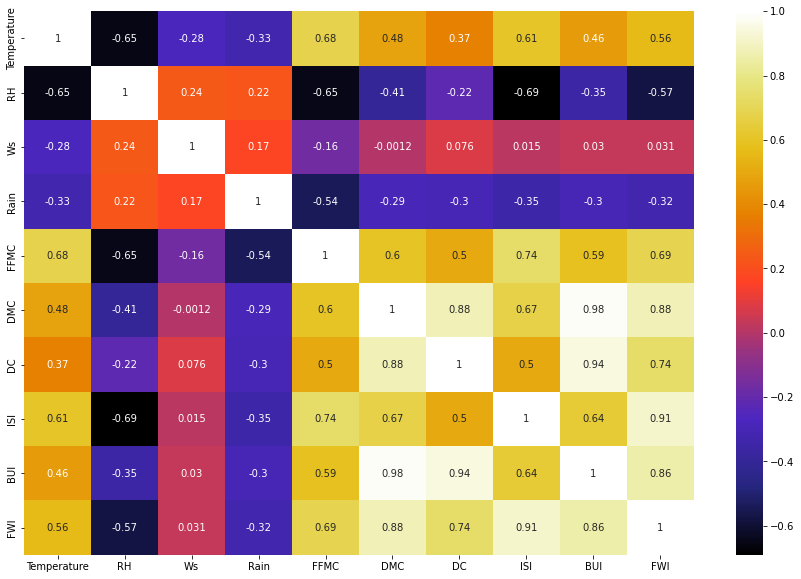

In [27]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

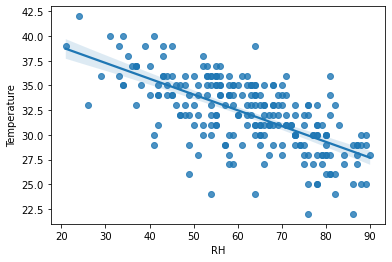

In [28]:
sns.regplot(x="RH",y="Temperature",data=df)

In [29]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['Classes'] = lab.fit_transform(df['Classes'])

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

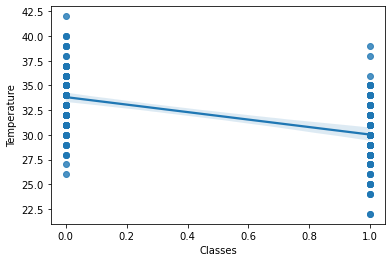

In [30]:
sns.regplot(x="Classes",y="Temperature",data=df)

<AxesSubplot:xlabel='Ws', ylabel='Temperature'>

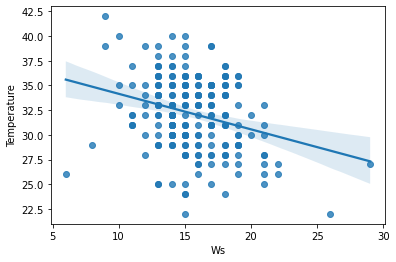

In [31]:
sns.regplot(x="Ws",y="Temperature",data=df)

In [32]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,bejaia
1,02,06,2012,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,bejaia
2,03,06,2012,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,bejaia
3,04,06,2012,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,bejaia
4,05,06,2012,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,bejaia


In [33]:
## Independent And Dependent Features
X=df.iloc[:,4:-2]
y=df.iloc[:,3]

In [34]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [35]:
y.head()

0    29.0
1    29.0
2    26.0
3    25.0
4    27.0
Name: Temperature, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

In [37]:
X_train.shape

(163, 9)

In [38]:
y_train.shape

(163,)

In [39]:
X_test.shape

(81, 9)

In [40]:
y_test.shape

(81,)

In [41]:
scaler=StandardScaler()

In [42]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model Training

In [43]:
regression=LinearRegression()

In [44]:
regression.fit(X_train,y_train)

LinearRegression()

In [45]:
## print the coefficients and the intercept
print(regression.coef_)

[-1.23604348 -0.54672798 -0.210017    1.01032985  0.42362952  0.70085775
  0.40772542 -0.59552075 -0.27739162]


In [46]:
print(regression.intercept_)

32.17791411042945


In [47]:
## PRediction for the test data
reg_pred=regression.predict(X_test)

In [48]:
reg_pred

array([31.71693047, 33.28611966, 33.55218026, 31.85359848, 33.02030699,
       34.81113895, 33.77735109, 33.7129994 , 32.03782337, 33.0493821 ,
       33.63266895, 27.79454036, 35.24900009, 29.43375802, 31.88820371,
       31.88252437, 33.92776643, 28.13603453, 36.12703901, 34.3065371 ,
       32.77406703, 33.85271715, 33.70076332, 32.81488221, 35.97650936,
       28.82199413, 32.33195207, 33.15154578, 27.70585319, 32.21350032,
       26.16712075, 26.80102077, 34.06753801, 32.00129426, 32.96273715,
       30.58019755, 29.01832834, 32.43393306, 27.75097314, 35.41946495,
       32.63468793, 34.01616985, 33.93539545, 31.13855101, 36.38031471,
       34.14244408, 24.98080694, 34.97390767, 33.77600615, 29.69064088,
       31.22298212, 32.52213814, 35.59805157, 32.17448515, 30.34924676,
       30.33443886, 32.69859548, 36.08778297, 31.33575992, 33.492012  ,
       32.36930454, 32.73692244, 31.15909482, 24.74054119, 31.69554593,
       36.24848226, 29.60045972, 30.03649815, 34.83436878, 33.47

# Assumptions Of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

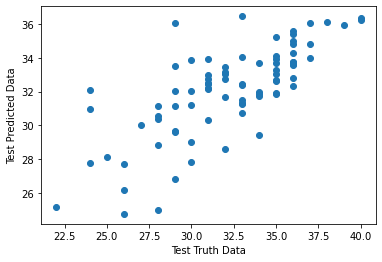

In [49]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [50]:
## residuals
residuals=y_test-reg_pred

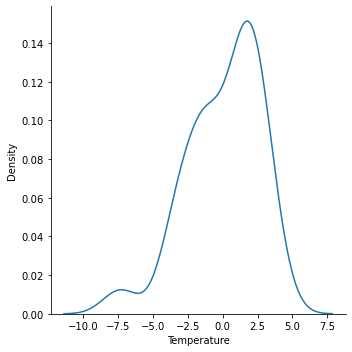

In [51]:
sns.displot(residuals,kind="kde")

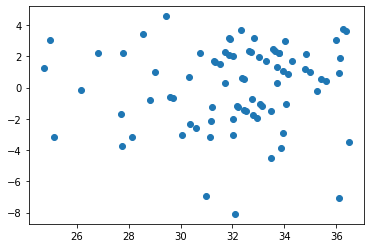

In [52]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

In [53]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.88195108834568
2.1737777928417614
2.6233473060854293


# R square and adjusted R square

In [54]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5449164356201898


In [55]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4872297866142984

In [56]:
## Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()

In [57]:
ridge.fit(X_train,y_train)

Ridge()

In [58]:
reg_pred=ridge.predict(X_test)

In [59]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5442500491183504


In [60]:
print(ridge.score(X_test, y_test))

0.5442500491183504


In [61]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso()
lassoModelChosen.fit(X_train, y_train)

# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))


0.39784019626969913


In [63]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train,y_train)
ElasticNet(random_state=0)
print(regr.coef_)
print(regr.intercept_)


[-0.68229825 -0.10826824 -0.01957093  0.69985933  0.07857185  0.
  0.24379738  0.04538573  0.1399126 ]
32.17791411042945


In [64]:
print(regr.score(X_test, y_test))

0.4509395550021015
